# Análisis de métodos de predicción

## Tarea 2
**Alumno: Santiago López Rojas** /
**Curso: Reconocimiento de patrones**
    
Objetivos:
* Explicación de uso de corss-validation.
* Lectura y acomodo del set de datos para procesamiento.
* Aplicación de 7 métodos de predicción modificando hiper-parametros y funciones de optimización.
* Analizar todas las estrategias y determinar la mejor para el caso de estudio.

Se usan los siguientes algoritmos de predicción:
1. Logistic Regression
2. k Nearest Neighbors
3. SVC
4. Naive Bayes
5. Decision Trees
6. AdaBoost
7. GradientBoosting

    

## Librerias

In [4]:
#Se inicia por importar las bibliotecas necesarias para manejo de datos 
#(como pandas, numpy y statistics), bibliotecas para imprimir resultados 
#en pantalla (como matplotlib) y bibliotecas que contienen los algoritmos 
#de predicción (sklearn)

import numpy as np
import pandas as pd
import seaborn as sns
#pytorch usa tensores, y esta es la mayor diferencia
import torch
from statistics import mean, median
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.datasets  import make_blobs

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

## Cross-Validation

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold

### ¿Por qué usar cross-validation?

Cuando se divide el set de datos en *Train* y en *Test* los resultados del entrenamiento van a depender de como fueron constituidos estos sets. Esto se puede ejemplificar con el siguiente ejemplo usando el set de datos de sklearn *load_iris*

In [6]:
#Se lee el set Iris de datos
iris = load_iris()

# Se crea los sets de datos X (feature) y Y (Response). 
X = iris.data
Y = iris.target

# Se usa el comando "train_test_split" para dividir entre set de entrenamineto
#y set de test
X_train, X_test, y_train, y_test = train_test_split(X, Y)

# Se chequea la precision usando un algoritmo KNN (se explica mas adelante)
# Se define el modelo con 5 neigbors solo para ejemplificar
knn = KNeighborsClassifier(n_neighbors=5)

# Se entrena el modelo
knn.fit(X_train, y_train)

# Se realiza una prediccion usando el set de test y se imprime el resultado
y_pred = knn.predict(X_test)
print("Porsentaje de accuracy:", metrics.accuracy_score(y_test, y_pred))

Porsentaje de accuracy: 0.9473684210526315


In [7]:
#Ahora si se corre otra vez el split y el entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X, Y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Porsentaje de accuracy:", metrics.accuracy_score(y_test, y_pred))

Porsentaje de accuracy: 0.9736842105263158


### Resultados

Como se ve, se tendrá un resultado diferente aunque estemos usando las mismas líneas de código. Esto es por que el entrenamiento depende directamente del set de Train, si este cambia, los paramentros que se modifican en el entrenamiento se verán modificados también. 

Entonces, **¿Cómo solucionar esto?** ¿Cómo saber si el modelo es bueno o si es solamente un resultado aislado de un set de Train/Test particular? Para esto se usa el *Cross-validation*.

A grandes razgos el proceso lo que hace es ejecutar varias veces el proceso de *train_test_split* variando siempre cuales son los datos de test y train, pondera los resultados y saca una varianza. Ahora, existen muchos tipos de *Cross-validation* siendo el más común el *K-fold*

### Pasos para el uso de k-flod corss-validation

1. Dividir el dataset en K particiones **iguales** (conocidos como "folds").
2. Usar *fold* 1 como **Test** y la unión de los otros *flods* **Train**.
3. Calcular el **testing accuracy**.
4. Repetir los pasos 2 y 3 K veces, usando **diferentes fold** como **Test** en cada ocasión.
5. Usar el **testing accuracy promedio** como el resultado final.

En la siguiente figura se ejemplifica mejor:

![07_cross_validation_diagram](images/07_cross_validation_diagram.png)

In [8]:
#Para seguir con la explicació se usa el siguiente código

#Se define un set de que se divide en 5 folds, se le indica que no desordene los datos
#(shuffle=False)
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# Imprimimos el resultado de la división
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))

for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


### ¿Otras aplicaciones?

Otra utilidad de usar Cross-Validation es para el momento del *hiper-parameter tuning*, ayudando a determinar los mejores hiper-paramentros para usar en el modelo según sea el algoritmo que se esta empleando. Para demostrar esto usaremos el set de datos load_iris del ejemplo anterior.

In [9]:
#Se incluye la funcion cross_val_score que nos ayuda para hacer la cross-validation
from sklearn.model_selection import cross_val_score

In [10]:
# Se hace un 10-fold cross-validation con un K=5 para el KNN (este es el hiper-parametro del KNN)
knn = KNeighborsClassifier(n_neighbors=5)

# scores  -> nos da el resultado de la metrica para cada fold 
# knn     -> es el modelo que se esta testeando
# X       -> Features sin dividir
# Y       -> Targets sin dividir
# cv      -> cantidad de folds que se desean
# scoring -> tipo de metrica que se desea obtener
scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [11]:
#scores posee la funcion mean() que nos da el promedio
print(scores.mean())

0.9666666666666668


Text(0, 0.5, 'Cross-Validated Accuracy')

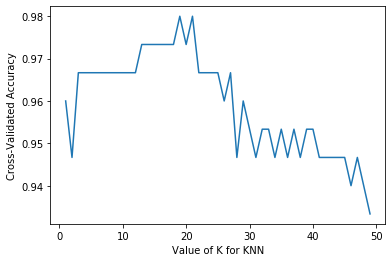

In [12]:
# Para saber cual es el mejor k para determinar un patron se obtiene usando un ciclo for
# y lo ploteamos para ver graficamente los resultados.

k_range = list(range(1, 50))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=30, scoring='accuracy')
    k_scores.append(scores.mean())

#plot
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

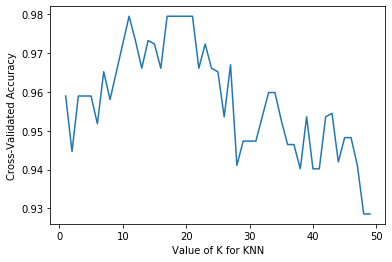

In [13]:
# Para saber cual es el mejor k para determinar un patron se obtiene usando un ciclo for
# y lo ploteamos para ver graficamente los resultados.

k_range = list(range(1, 50))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=20, scoring='accuracy')
    k_scores.append(scores.mean())

#plot
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Lectura y procesado de datos

Para probar los algoritmos de clasificación se buscó un set de datos un poco más sencillo. Este se llama **"
Heart failure clinical records Data Set"**. que se puede encontrar en: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

Este set de datos contiene el historial médico de 299 pasientes que sufrieron un ataque cardiaco y sobrevivieron en primera instancia. Los datos fueron recolectados durante el periodo de recuperación (follow-up period) y se dividen en columnas de la siguiente manera:

1. **age**: Edad del paciente al momento del inicio de la recuperación (en años).
2. **anaemia**: Dato booleano, indica si el paciente tenía o no anemia (cuenta de globulos rojos).
3. **creatinine_phosphokinase**: indica el nivel de CPK enzyme en la sangre (mcg/L).
4. **diabetes**: Dato booleano, que indica si el paciente era diabetico.
5. **ejection_fraction**: Porcentaje de sangre dejando el corazón cuando este se contrae (%).
6. **high_blood_pressure**: Dato booleano, que indica si el paciente tenía presión alta.
7. **platelets**: Cuenta de plaquetas del paciente (kiloplatelets/mL).
8. **serum_creatinine**: Indica el nivel de serum creatinine en la sangre (mg/dL).
9. **serum_sodium**: Indica el nivel de serum sodium en la sangre (mEq/L).
10. **sex**: Masculino (0) y Femenino (1).
11. **smoking**: Dato booleano, que indica si el paciente era fumador.
12. **time**: Cantidad de días que se le dio como follow-up period al paciente.
13. **DEATH_EVENT**: Dato booleano,  que indica si el paciente sobrevivió o no al tiempo de recuperación (TARGET)

El objetivo del analicis es determinar si a partir de los datos de las primeras 12 columnas es posible predecir si un paciente va o no a sobrevivir el periodo de recuperación luego de sufrir un ataque cardiaco. El resultado es binario 0 (recuperación) 1 (No logra superar la recuperación). 

In [133]:
#Se importa la data de los pacientes en el data frame denominado "data"
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data = pd.DataFrame(data)

In [134]:
#Se imprime el head() para ver la forma del data set y como se ve no hay que realizar ningun cambio
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [135]:
#Vamos a ver la cantidad de lineas que se tienen en el set de datos, el esperado es 299 ya que es una
#linea por paciente
print('Cantidad de muestras:', len(data))

Cantidad de muestras: 299


Se grafica algunos datos para ver algún patrón, obteniendo: 

* Los pacientes con un tiempo de recuperación menor poseen mejores oportunidades de sobrevivir.
* Los pacientes más jovenes poseen también la mayor taza de mortalidad.
* Se ve también que a mayores niveles de serum_sodium en la sangre y la mortalidad de los pacientes es menor.
* Se ve una importante predispocision a morir por parte del sexo masculino.
* La mayor parte de las muertes de fumadores son hombres, aunque el ser fumador no da como resultado ser una condición que favorezca al deceso
* El mosmo caso ocurre con los pacientes diabeticos, quienes también en su mayoría logran recuperarse.



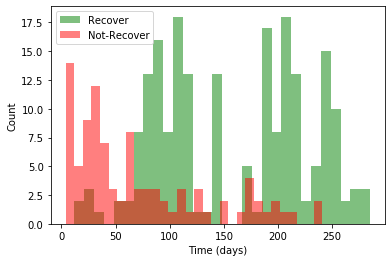

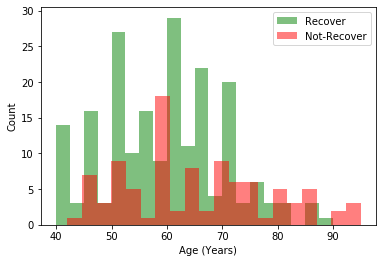

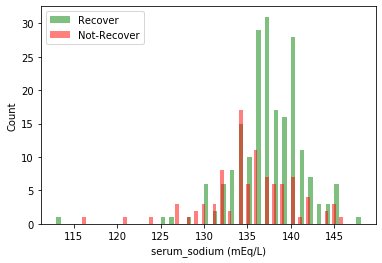

In [163]:
#Muertes y Recuperaciones segun tiempo de estadia (dias)
num_bins = 30
n, bins, patches = plt.hist(data.loc[data.DEATH_EVENT == 0].time, num_bins, facecolor='green', alpha=0.5)
n, bins, patches = plt.hist(data.loc[data.DEATH_EVENT == 1].time, num_bins, facecolor='red', alpha=0.5)
plt.legend(('Recover', 'Not-Recover'))
plt.ylabel('Count')
plt.xlabel('Time (days)')
plt.show()


#Muertes y Recuperaciones segun condicion de edad
num_bins = 20
n, bins, patches = plt.hist(data.loc[data.DEATH_EVENT == 0].age, num_bins, facecolor='green', alpha=0.5)
n, bins, patches = plt.hist(data.loc[data.DEATH_EVENT == 1].age, num_bins, facecolor='red', alpha=0.5)
plt.legend(('Recover', 'Not-Recover'))
plt.ylabel('Count')
plt.xlabel('Age (Years)')
plt.show()


#Muertes y Recuperaciones segun condicion de edad
num_bins = 70
n, bins, patches = plt.hist(data.loc[data.DEATH_EVENT == 0].serum_sodium, num_bins, facecolor='green', alpha=0.5)
n, bins, patches = plt.hist(data.loc[data.DEATH_EVENT == 1].serum_sodium, num_bins, facecolor='red', alpha=0.5)
plt.legend(('Recover', 'Not-Recover'))
plt.ylabel('Count')
plt.xlabel('serum_sodium (mEq/L)')
plt.show()


Muertes de pacientes según el sexo


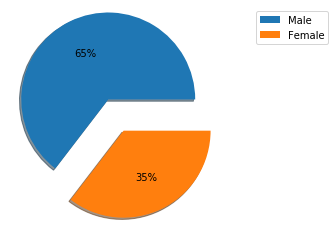

Muertes de pacientes según condición de fumador


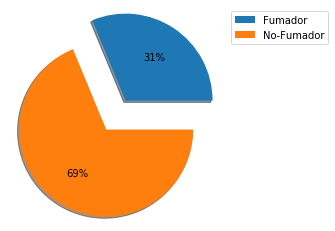

Muertes de pacientes según condición de Diabetes


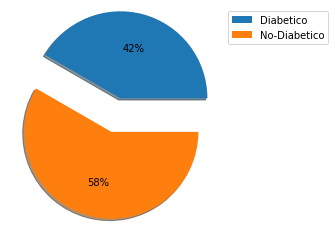

In [197]:
#Comparacion por sexo
aux = data.loc[data.DEATH_EVENT == 1].sex
M = aux[aux == 1]
F = aux[aux == 0]

X = [len(M), len(F)]
Y = ['Male', 'Female']

print("Muertes de pacientes según el sexo")
explode = (0.2, 0.2)
plt.pie(X, shadow=True, autopct='%1.0f%%', explode=explode)
plt.legend(labels=Y,bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


#Comparacion por fumador activo
aux = data.loc[data.DEATH_EVENT == 1].smoking
F  = aux[aux == 1]
NF = aux[aux == 0]

X = [len(F), len(NF)]
Y = ['Fumador', 'No-Fumador']

print("Muertes de pacientes según condición de fumador")
explode = (0.2, 0.2)
plt.pie(X, shadow=True, autopct='%1.0f%%', explode=explode)
plt.legend(labels=Y,bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

#Comparacion por pacientes diabeticos
aux = data.loc[data.DEATH_EVENT == 1].diabetes
F  = aux[aux == 1]
NF = aux[aux == 0]

X = [len(F), len(NF)]
Y = ['Diabetico', 'No-Diabetico']

print("Muertes de pacientes según condición de Diabetes")
explode = (0.2, 0.2)
plt.pie(X, shadow=True, autopct='%1.0f%%', explode=explode)
plt.legend(labels=Y,bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Cantidad de muertes según sexo de pacientes con condición de Diabetes


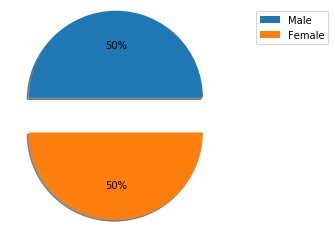

Cantidad de muertes según sexo de pacientes con condición de fumadores


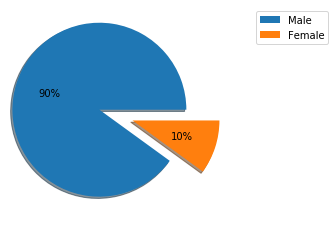

In [199]:
#Comparacion por pacientes diabeticos
aux = data.loc[(data.DEATH_EVENT == 1) & (data.diabetes == 1)].sex
M = aux[aux == 1]
F = aux[aux == 0]

X = [len(M), len(F)]
Y = ['Male', 'Female']

print("Cantidad de muertes según sexo de pacientes con condición de Diabetes")
explode = (0.2, 0.2)
plt.pie(X, shadow=True, autopct='%1.0f%%', explode=explode)
plt.legend(labels=Y,bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


#Comparacion por pacientes diabeticos
aux = data[(data.DEATH_EVENT == 1) & (data.smoking == 1)].sex
M = aux[aux == 1]
F = aux[aux == 0]

X = [len(M), len(F)]
Y = ['Male', 'Female']

print("Cantidad de muertes según sexo de pacientes con condición de fumadores")
explode = (0.2, 0.2)
plt.pie(X, shadow=True, autopct='%1.0f%%', explode=explode)
plt.legend(labels=Y,bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Gráfica Recuperación/Deceso para pacientes con condición de fumadores


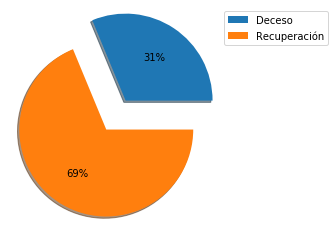

Gráfica Recuperación/Deceso para pacientes con condición de Diaberes


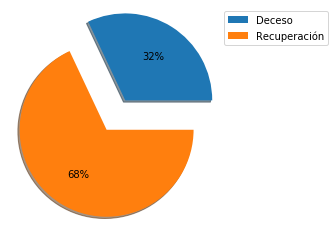

In [201]:
#Comparacion por pacientes diabeticos
aux = data[(data.smoking == 1)].DEATH_EVENT
M  = aux[aux == 1]
NM = aux[aux == 0]

X = [len(M), len(NM)]
Y = ['Deceso', 'Recuperación']

print("Gráfica Recuperación/Deceso para pacientes con condición de fumadores")
explode = (0.2, 0.2)
plt.pie(X, shadow=True, autopct='%1.0f%%', explode=explode)
plt.legend(labels=Y,bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

#Comparacion por pacientes diabeticos
aux = data[(data.diabetes == 1)].DEATH_EVENT
M  = aux[aux == 1]
NM = aux[aux == 0]

X = [len(M), len(NM)]
Y = ['Deceso', 'Recuperación']

print("Gráfica Recuperación/Deceso para pacientes con condición de Diaberes")
explode = (0.2, 0.2)
plt.pie(X, shadow=True, autopct='%1.0f%%', explode=explode)
plt.legend(labels=Y,bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

# Modelos de Predicción
## Set train and test Data

In [204]:
#Se divide en datos dependientes (Y) e independientes (X) y se colocan en 
#formato np.array
Y = np.array(data.DEATH_EVENT)
data = data.drop(['DEATH_EVENT'], axis=1)
X = np.array(data)

In [29]:
#En esta línea se podría hacer la división entre Test y Train pero al usar Cross-Validation
#esta línea ya no es necesaria, aunque se deja por cultura general
test_size = 0.15
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

## Logistic Regression

Es un algortimo de clasificación que está destinado a estimar resultados resultados binarios (1 o 0). Requiere una cantida de muestras muy grandes para conseguir resultados precisos. Es de los algoritmos más fáciles de implementar, teniendo un bajo consumo computacional. Más información en https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Para encontrar la mejor aproximación se cambió el *solver* que es el algoritmo de optimización para ver cual es el que da mejores resultados para el caso de análisis.

In [54]:
from sklearn.linear_model import LogisticRegression

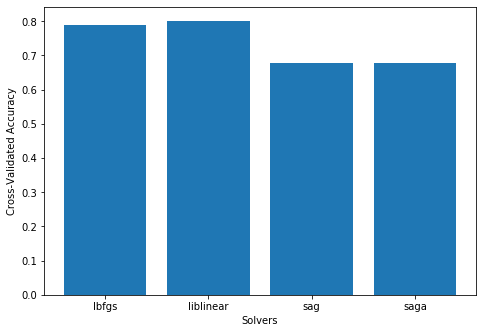

El mejor resultado se obtuvo con: liblinear
Alcanzando un Accuracy de: 0.8022988505747127


In [55]:
solver_list = ['lbfgs', 'liblinear', 'sag', 'saga']
lr_scores = []
tol=0.00013
for solver_n in solver_list:
    #Inicializacion del modelo
    LR     = LogisticRegression(solver = solver_n, max_iter=10000, tol=tol)
    
    #Validacion con cross-validation
    scores = cross_val_score(LR, X, Y, cv=10, scoring='accuracy')
    lr_scores.append(scores.mean())

#plot
fig = plt.figure()
ax  = fig.add_axes([0,0,1,1])
ax.bar(solver_list,lr_scores)
plt.xlabel('Solvers')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Max =  max(lr_scores)
print("El mejor resultado se obtuvo con:", solver_list[lr_scores.index(Max)])
print("Alcanzando un Accuracy de:", Max)

## kNN (k Nearest Neihbors)

Método que busca en las observaciones más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean, el valor k es el que varía y significa la cantidad vecinos debe tener cerca el caso para ser clasificado. Más información en https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

En este caso se varía el k para encontrar la mejor configuración, siempre se busca el menor k para la mayor precisión.

In [56]:
from sklearn.neighbors import KNeighborsClassifier

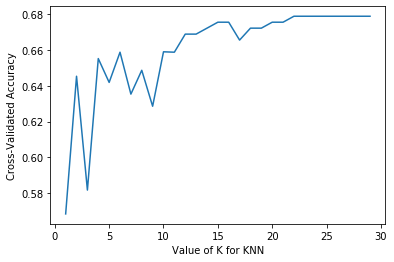

El mejor resultado se obtuvo con: 21
Alcanzando un Accuracy de: 0.6789655172413793


In [57]:
neighbors_settings = range(1,30)
k_scores = []

for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    KNN = KNeighborsClassifier(n_neighbors=n_neighbors)

    #Validacion con cross-validation
    scores = cross_val_score(KNN, X, Y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

#plot
plt.plot(neighbors_settings, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Max =  max(k_scores)
print("El mejor resultado se obtuvo con:", k_scores.index(Max))
print("Alcanzando un Accuracy de:", Max)

## SVM

Máquina de vector de soporte. Este método busca la línea que separa de manera óptima las clases que existen en los datos. Por ejemplo:

Si se tienen dos tipos de datos (Circulos y cuadrados) y se busca dividirlos/separarlos. Entonces se incorpora los denominados "Vectores de soporte", estos son líneas que rozan los datos más cercanos a la línea de separación (límite de decisión). Entonces para dividir los circulos y cuadrados la distancia entre los vectores de soporte debe ser máximo. Más información en https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

En este caso vamos a variar el núcleo del algoritmo (KERNEL) 

In [58]:
from sklearn.svm import SVC

In [67]:
kernel_list   = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_scores = []
tol=0.00013

for kernel_n in kernel_list:
    svc    = SVC(kernel=kernel_n, tol=tol)
    scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')
    kernel_scores.append(scores.mean())

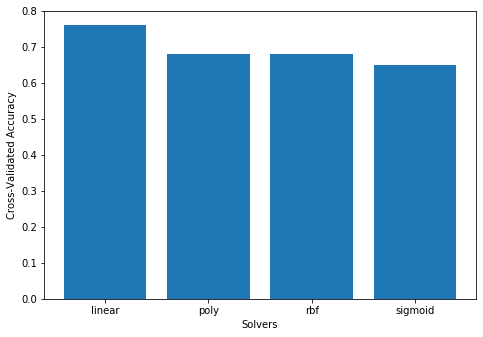

El mejor resultado se obtuvo con: linear
Alcanzando un Accuracy de: 0.7622988505747127


In [68]:
#plot
fig = plt.figure()
ax  = fig.add_axes([0,0,1,1])
ax.bar(kernel_list,kernel_scores)
plt.xlabel('Solvers')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Max =  max(kernel_scores)
print("El mejor resultado se obtuvo con:", kernel_list[kernel_scores.index(Max)])
print("Alcanzando un Accuracy de:", Max)

## naive Bayes

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [70]:
from sklearn.naive_bayes import GaussianNB

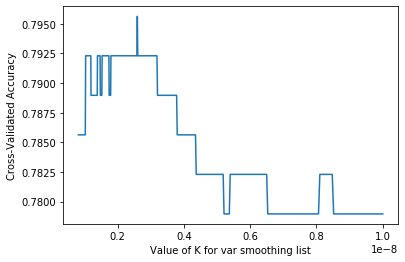

El mejor resultado se obtuvo con un var_smoothing_list de: 2.5966219297210493e-09
Alcanzando un Accuracy de: 0.7956321839080459


In [130]:
var_smoothing_list = []
nB_scores = []

var_smoothing = 1e-8

for n in range(500):
    nbg = GaussianNB(var_smoothing = var_smoothing)
    scores = cross_val_score(nbg, X, Y, cv=10, scoring='accuracy')
    nB_scores.append(scores.mean())
    var_smoothing_list.append(var_smoothing)
    var_smoothing = var_smoothing*0.995
    
#plot
plt.plot(var_smoothing_list, nB_scores)
plt.xlabel('Value of K for var smoothing list')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Max =  max(nB_scores)
print("El mejor resultado se obtuvo con un var_smoothing_list de:", var_smoothing_list[nB_scores.index(Max)])
print("Alcanzando un Accuracy de:", Max)

## Decision Trees

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
tree = DecisionTreeClassifier(criterion = 'entropy')
scores = cross_val_score(tree, X, Y, cv=10, scoring='accuracy')

print("Accuracy on cross-validation =",scores.mean())

Accuracy on cross-validation = 0.6789655172413793


## AdaBoost

Un clasificador AdaBoost es un meta-estimador. Su nombre se deriba de Adaptive Boosting, para explicar el funcionamiento vamos a utilizar el siguiente diagrama, donde se intenta separar los signos + y -:


![AddaBoost](images/AddaBoost.png)


* El box 1 hace la primera prediccion, trazando una linea vertical y separando ciertos signos +, pero la clasificación no es correcta. 
* El box 2 traza otra línea para clasificar, también incorrectamente, aunque esta abarca mayor parte del recuadro. 
* Finalmente, se realiza otra predicción más y se procede a juntar las 3 predicciones en una única.

A grandes razgos, AddaBoost lo que hace es juntar modelos de baja precisión para conseguir un mejor resultado, esto es un proceso iterativo que termina cuando se alcanza el número máximo de modelos sumados o hasta que se logra el accuracy deseado.

Para más información visitar:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/#:~:text=AdaBoost%20(Adaptive%20Boosting)%20%3A%20It,equal%20weight%20to%20each%20observation.&text=We%20can%20use%20AdaBoost%20algorithms%20for%20both%20classification%20and%20regression%20problem.

In [202]:
from sklearn.ensemble import AdaBoostClassifier

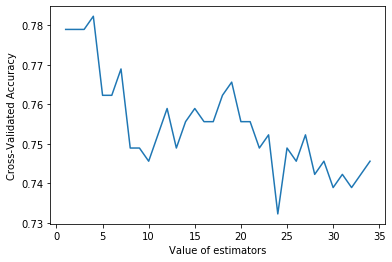

El mejor resultado se obtuvo con: 4 estimators
Alcanzando un Accuracy de: 0.7822988505747126


In [211]:
n_estimators_list   = range(1,35)
n_estimators_scores = []

for n_estimators in n_estimators_list:
    # se construye el modelo de clasificacion
    AB = AdaBoostClassifier(n_estimators=n_estimators, algorithm='SAMME')

    #Validacion con cross-validation
    scores = cross_val_score(AB, X, Y, cv=10, scoring='accuracy')
    n_estimators_scores.append(scores.mean())

#plot
plt.plot(n_estimators_list, n_estimators_scores)
plt.xlabel('Value of estimators')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Max =  max(n_estimators_scores)
print("El mejor resultado se obtuvo con:", n_estimators_list[n_estimators_scores.index(Max)], "estimators")
print("Alcanzando un Accuracy de:", Max)

# GradientBoostingClassifier

Funcionando de manera similar al AddaBoost, el Gradient Boosting se usa también para clasificación. Siguiendo con la idea del AddaBoost el clasificador de aumento de gradiente es un conjunto aditivo de un modelo base cuyo error se corrige en iteraciones sucesivas mediante la adición de árboles de regresión que corrigen el error de la iteración anterior.

Al igual que en el AddaBoost lo que se modifica es la cantidad de modelos base que se suman, en este caso se refiere a la cantidad de iteraciones que corrigen el error residual y en los resultados, como es de esperar se tienen mejores resultados conforme se aumenta la cantidad de iteraciones, aunque se llega a un límite de mejora.

Para mayor información se puede ver:
https://riptutorial.com/es/scikit-learn/example/13747/gradientboostingclassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

In [213]:
from sklearn.ensemble import GradientBoostingClassifier

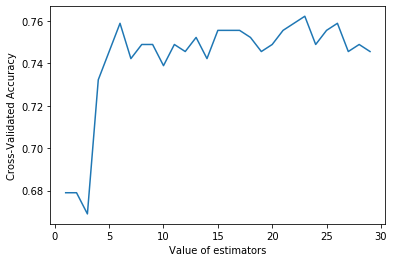

El mejor resultado se obtuvo con: 23 estimators
Alcanzando un Accuracy de: 0.7622988505747127


In [218]:
n_estimators_list   = range(1,30)
n_estimators_scores = []

for n_estimators in n_estimators_list:
    # se construye el modelo de clasificacion
    GB = GradientBoostingClassifier(n_estimators=n_estimators)

    #Validacion con cross-validation
    scores = cross_val_score(GB, X, Y, cv=10, scoring='accuracy')
    n_estimators_scores.append(scores.mean())

#plot
plt.plot(n_estimators_list, n_estimators_scores)
plt.xlabel('Value of estimators')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Max =  max(n_estimators_scores)
print("El mejor resultado se obtuvo con:", n_estimators_list[n_estimators_scores.index(Max)], "estimators")
print("Alcanzando un Accuracy de:", Max)

# Conclusiones

Como se puede ver en las comparaciones los mejores resultados se obtienen con los metodos Logistic Regression, AdaBoost, naive Bayes y el GradientBoosting. Estos tres últimos logran resultados casi iguales al primero siendo igualmente validos.

Se recomienda usar Logistic Regression con el algoritmo de optimización *liblinear*. Este resultado se le atribuye a la naturaleza del set de datos, al tener una clasificación binaria (Recuperación del paciente positiva o negativa). No obstante, se recomienda incrementar la cantidad de pacientes en analisis para poder dar una mejor predicción.